In [24]:
# Load YOLOv8s, train it 

from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import numpy as np


model = YOLO('./best.pt')

In [45]:
img = cv2.imread('./YOLO_dataset/validation/images/IMG_7923.jpeg')
print(img.shape)

# imgsz -> размер как при обучении модели
# iou -> если один bounding box заходит на другой, то формула расчета: площать пересечения / общая площать 2 прямоугольников. 
#  (насколько хорошо наша предсказанная ограничивающая рамка перекрывается с основной истинной ограничивающей рамкой. Чем выше IoU, тем выше производительность. )
# conf -> уверенность (определить значение через графики, составляемые при обучении)
results = model(img, imgsz=640, iou=0.4, conf=0.5, verbose=True)

(4032, 3024, 3)

0: 640x480 1 spoon, 374.5ms
Speed: 4.1ms preprocess, 374.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


    Args:  
        orig_img (numpy.ndarray): The original image as a numpy array.
        path (str): The path to the image file.
        names (dict): A dictionary of class names.
        boxes (torch.tensor, optional): A 2D tensor of bounding box coordinates for each detection.
        masks (torch.tensor, optional): A 3D tensor of detection masks, where each mask is a binary image.
        probs (torch.tensor, optional): A 1D tensor of probabilities of each class for classification task.
        keypoints (List[List[float]], optional): A list of detected keypoints for each object.

    Attributes:
        orig_img (numpy.ndarray): The original image as a numpy array.
        orig_shape (tuple): The original image shape in (height, width) format.
        boxes (Boxes, optional): A Boxes object containing the detection bounding boxes.
        masks (Masks, optional): A Masks object containing the detection masks.
        probs (Probs, optional): A Probs object containing probabilities of each class for classification task.
        keypoints (Keypoints, optional): A Keypoints object containing detected keypoints for each object.
        speed (dict): A dictionary of preprocess, inference, and postprocess speeds in milliseconds per image.
        names (dict): A dictionary of class names.
        path (str): The path to the image file.
        _keys (tuple): A tuple of attribute names for non-empty attributes.

## results[0].boxes: 

A class for storing and manipulating detection boxes.

    Args:
        boxes (torch.Tensor | numpy.ndarray): A tensor or numpy array containing the detection boxes,
            with shape (num_boxes, 6) or (num_boxes, 7). The last two columns contain confidence and class values.
            If present, the third last column contains track IDs.
        orig_shape (tuple): Original image size, in the format (height, width).

    Attributes:
        xyxy (torch.Tensor | numpy.ndarray): The boxes in xyxy format.
        conf (torch.Tensor | numpy.ndarray): The confidence values of the boxes.
        cls (torch.Tensor | numpy.ndarray): The class values of the boxes.
        id (torch.Tensor | numpy.ndarray): The track IDs of the boxes (if available).
        xywh (torch.Tensor | numpy.ndarray): The boxes in xywh format.
        xyxyn (torch.Tensor | numpy.ndarray): The boxes in xyxy format normalized by original image size.
        xywhn (torch.Tensor | numpy.ndarray): The boxes in xywh format normalized by original image size.
        data (torch.Tensor): The raw bboxes tensor (alias for `boxes`).

    Methods:
        cpu(): Move the object to CPU memory.
        numpy(): Convert the object to a numpy array.
        cuda(): Move the object to CUDA memory.
        to(*args, **kwargs): Move the object to the specified device.

In [7]:
results[0].boxes  # (Можно и так, например: results[0].boxes.xywhn)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1.])
conf: tensor([0.7372])
data: tensor([[7.7197e+02, 1.5286e+03, 1.3921e+03, 3.3913e+03, 7.3723e-01, 1.0000e+00]])
id: None
is_track: False
orig_shape: (4032, 3024)
shape: torch.Size([1, 6])
xywh: tensor([[1082.0341, 2459.9578,  620.1270, 1862.6266]])
xywhn: tensor([[0.3578, 0.6101, 0.2051, 0.4620]])
xyxy: tensor([[ 771.9705, 1528.6444, 1392.0975, 3391.2710]])
xyxyn: tensor([[0.2553, 0.3791, 0.4603, 0.8411]])

In [9]:
results[0].boxes.conf

tensor([0.7372])

## results[0].names

In [ ]:
results[0].names

{0: 'knife', 1: 'spoon'}

## results[0].masks

    Attributes:  
        - data: бинарная маска
        - orig_shape: оригинальный размер изображения (4032, 3024)
        - shape: размер после ресайза torch.Size([1, 640, 480])
        - xy (float32): координаты точек контура найденных объектов
        - xyn (float32): те же координаты, но относительно размеров изображения


In [10]:
results[0].masks

ultralytics.engine.results.Masks object with attributes:

data: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
orig_shape: (4032, 3024)
shape: torch.Size([1, 640, 480])
xy: [array([[        819,      1537.2],
       [      806.4,      1549.8],
       [      806.4,        1575],
       [      787.5,      1593.9],
       [      787.5,      1600.2],
       [      781.2,      1606.5],
       [      781.2,      1795.5],
       [      800.1,      1814.4],
       [      800.1,      1820.7],
       [      806.4,        1827],
       [      806.4,      1864.8],
       [      812.7,      1871.1],
       [      812.7,      1877.4],
       [      831.6,      1896.3],
       [      831.6,      1908.9],
       [      850.5,      1927.8],
       [      850.5,      1934.1],
       [      85

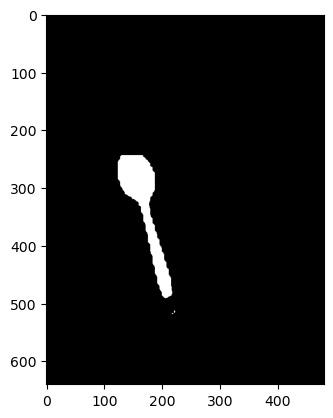

In [13]:
# Показать конкретный контур на бинарной маске

plt.imshow(results[0].masks.data[0].cpu().numpy(), "gray")

In [15]:
results[0].masks.data.shape

torch.Size([1, 640, 480])

## Show result on image

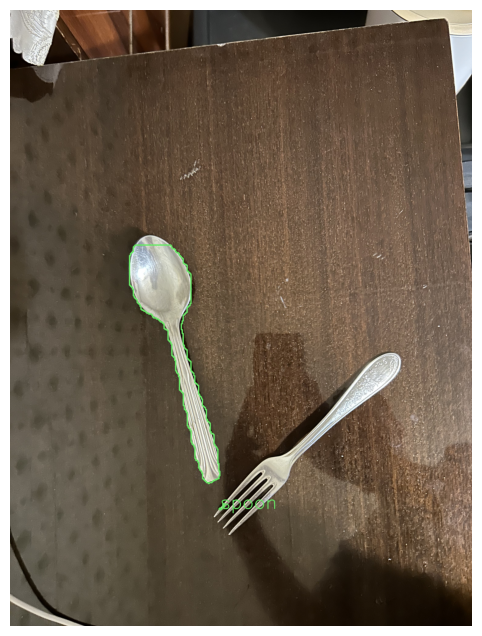

In [32]:
# Получение классов и имен классов
classes = results[0].boxes.cls.cpu().numpy()
class_names = results[0].names

# Получение бинарных масок и их количество
masks = results[0].masks.data  # Формат: [число масок, высота, ширина]
num_masks = masks.shape[0]

# Определение случайных цветов и прозрачности для каждой маски
colors = [tuple(np.random.randint(0, 256, 3).tolist()) for _ in range(num_masks)]

# Создание изображения для отображения масок
mask_overlay = np.zeros_like(img)

labeled_image = img.copy()


# Добавление подписей к маскам
for i in range(num_masks):
    color = colors[i]  # Случайный цвет
    mask = masks[i].cpu()

    # Изменение размера маски до размеров исходного изображения с использованием метода ближайших соседей
    mask_resized = cv2.resize(np.array(mask), (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)

    # Получение класса для текущей маски
    class_index = int(classes[i])
    class_name = class_names[class_index]

    # Добавление подписи к маске
    mask_contours, _ = cv2.findContours(mask_resized.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(labeled_image, mask_contours, -1, color, 8)
    cv2.putText(labeled_image, class_name, (int(mask_contours[0][:, 0, 0].mean()), int(mask_contours[0][:, 0, 1].mean())),
                cv2.FONT_HERSHEY_SIMPLEX, 4, color, 6)

# Итоговое изображение с наложенными масками и подписями
plt.figure(figsize=(8, 8), dpi=100)
labeled_image = cv2.cvtColor(labeled_image, cv2.COLOR_BGR2RGB)
plt.imshow(labeled_image)
plt.axis('off')
plt.show()


## With interactive settings (ipywidgets)

In [43]:
import cv2
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact


image = cv2.imread('./YOLO_dataset/validation/images/IMG_7923.jpeg')
 

def interactive_plot(alpha, iou, conf, imgsz):
    np.random.seed(32)
    
    results = model(image, imgsz=imgsz, iou=iou, conf=conf, verbose=False);

   # Получение бинарных масок и их количество
    masks = results[0].masks.data  # Формат: [число масок, высота, ширина]
    num_masks = masks.shape[0]

    # Определение случайных цветов и прозрачности для каждой маски
    colors = [tuple(np.random.randint(0, 256, 3).tolist()) for _ in range(num_masks)]

    # Создание изображения для отображения масок
    mask_overlay = np.zeros_like(image)

    # Наложение масок на изображение
    for i in range(num_masks):
        color = colors[i]  # Случайный цвет
        mask = masks[i].cpu()

        # Изменение размера маски до размеров исходного изображения с использованием метода ближайших соседей
        mask_resized = cv2.resize(np.array(mask), (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)
        #print(mask.shape, img.shape, mask_resized.shape)

        # Создание маски с цветом и прозрачностью
        color_mask = np.zeros_like(image)
        color_mask[mask_resized > 0] = color
        mask_overlay = cv2.addWeighted(mask_overlay, 1, color_mask, alpha, 0)

    # Объединение исходного изображения и масок
    result_image = cv2.addWeighted(image, 1, mask_overlay, 1, 0)

    # Отображение итогового изображения с наложенными масками
    plt.figure(figsize=(8, 8), dpi=100)
    result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
    plt.imshow(result_image)
    plt.axis('off')
    plt.show()

# Создание виджетов для изменения параметров
alpha_slider = widgets.FloatSlider(value=0.20, min=0.0, max=1.0, step=0.05, description='Alpha')
iou_slider = widgets.FloatSlider(value=0.65, min=0.0, max=1.0, step=0.05, description='IOU')
conf_slider = widgets.FloatSlider(value=0.15, min=0.0, max=1.0, step=0.05, description='Confidence')
imgsz_slider = widgets.IntSlider(value=608, min=32, max=2000, step=32, description='imgsz')

# Связь виджетов с функцией
interact(interactive_plot, alpha=alpha_slider, iou=iou_slider, conf=conf_slider, imgsz=imgsz_slider);

interactive(children=(FloatSlider(value=0.2, description='Alpha', max=1.0, step=0.05), FloatSlider(value=0.65,…

## Export in ONNX

In [46]:
model.export(format="onnx", imgsz=640, simplify=True)

Ultralytics YOLOv8.1.29 🚀 Python-3.9.13 torch-2.2.1 CPU (Intel Core(TM) i5-8259U 2.30GHz)

PyTorch: starting from 'best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 38, 8400), (1, 32, 160, 160)) (52.3 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxsim>=0.4.33', 'onnxruntime'] not found, attempting AutoUpdate...


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.3.3 requires pyqt5<5.16, which is not installed.
spyder 5.3.3 requires pyqtwebengine<5.16, which is not installed.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 793.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 584.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.7/240.7 kB 649.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 892.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 577.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 265.4 kB/s eta 0:00:00
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.11.2
    Uninstalling Pygments-2.11.2:
      Successfully uninstalled Pygments-2.11.2

requirements: AutoUpdate success ✅ 40.4s, installed 3 packages: ['onnx>=1.12.0', 'onnxsim>=0.4.33', 'onnxruntime']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



'best.onnx'

In [39]:
import cv2
import numpy as np
import onnx
import onnxruntime


# Загрузка модели ONNX
onnx_model = onnx.load("best.onnx")

# Создание сессии ONNX
ort_session = onnxruntime.InferenceSession("best.onnx")

# Загрузка изображения
image = cv2.imread("./YOLO_dataset/validation/images/IMG_7923.jpeg")

# # Преобразование к размерности: (1, 3, H, W)
resized_image = cv2.resize(image.copy(), (640, 640))
frame_transpose = np.transpose(resized_image, (2, 0, 1)).astype(np.float32)
frame_norm = frame_transpose / 255.0
result_frame = np.expand_dims(frame_norm, axis=0)

# # Получение предсказаний
output = ort_session.run(None, {'images': result_frame})

# Преобразование выходных данных, например, извлечение сегментации
segments = output[0]  # Предположим, что сегменты находятся в первом выходе
print(segments.shape)  # (1, 38, 8400)

# Отображение сегментации на изображении
# segment_map = np.argmax(segments, axis=1)  # Предполагая, что каждый пиксель имеет несколько классов
# segment_map = np.uint8(segment_map * (255/37))  # Пример: конвертация классов в цвета

# Применение сегментации к изображению
# segmented_image = cv2.addWeighted(image, 0.5, cv2.cvtColor(segment_map, cv2.COLOR_GRAY2BGR), 0.5, 0)
# segmented_image = cv2.addWeighted(image, 0.5, cv2.cvtColor(segment_map.reshape(38, 100), cv2.COLOR_GRAY2BGR), 0.5, 0)

# # Отображение и сохранение изображения с сегментацией
# plt.figure(figsize=(8, 8), dpi=100)
# result_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)
# plt.imshow(result_image)
# plt.axis('off')
# plt.show()

(1, 38, 8400)
